In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
import xgboost as xgb

In [4]:
# Request historical data for past 10 years
data = yf.Ticker("CCOLA.IS").history(period='10y')
data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-09-23 00:00:00+03:00,43.052975,43.052975,42.228994,43.052975,117115,0.0,0.0
2013-09-24 00:00:00+03:00,43.464962,43.876952,43.052972,43.464962,97397,0.0,0.0
2013-09-25 00:00:00+03:00,43.258967,43.876952,43.052972,43.464962,107638,0.0,0.0
2013-09-26 00:00:00+03:00,43.052968,43.052968,41.199013,41.199013,117488,0.0,0.0
2013-09-27 00:00:00+03:00,42.022996,42.846976,42.022996,42.434986,63988,0.0,0.0


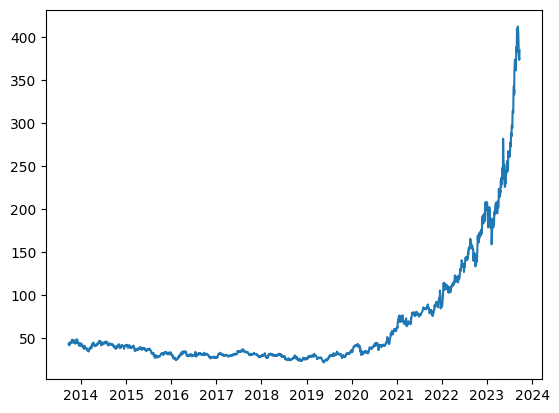

In [5]:
#visualize
plt.plot(data['Close'])
plt.show()

In [6]:
# date into month, year , day
data.reset_index(inplace=True)
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2013-09-23 00:00:00+03:00,43.052975,43.052975,42.228994,43.052975,117115,0.0,0.0
1,2013-09-24 00:00:00+03:00,43.464962,43.876952,43.052972,43.464962,97397,0.0,0.0
2,2013-09-25 00:00:00+03:00,43.258967,43.876952,43.052972,43.464962,107638,0.0,0.0
3,2013-09-26 00:00:00+03:00,43.052968,43.052968,41.199013,41.199013,117488,0.0,0.0
4,2013-09-27 00:00:00+03:00,42.022996,42.846976,42.022996,42.434986,63988,0.0,0.0


In [7]:
# date into month, year , day

splitted = data['Date'].astype(str).str.split(' ', expand=True)
data['NewDate'] = splitted[0]

splitted = data['NewDate'].str.split('-', expand=True)
data['year'] = splitted[0].astype('int')
data['month'] = splitted[1].astype('int')
data['day'] = splitted[2].astype('int')

data = data.drop("Date", axis='columns')
data = data.drop("NewDate", axis='columns')
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,year,month,day
0,43.052975,43.052975,42.228994,43.052975,117115,0.0,0.0,2013,9,23
1,43.464962,43.876952,43.052972,43.464962,97397,0.0,0.0,2013,9,24
2,43.258967,43.876952,43.052972,43.464962,107638,0.0,0.0,2013,9,25
3,43.052968,43.052968,41.199013,41.199013,117488,0.0,0.0,2013,9,26
4,42.022996,42.846976,42.022996,42.434986,63988,0.0,0.0,2013,9,27


In [8]:
#feature engineering

data['is_quarter_end'] = np.where(data['month']%3==0,1,0)
data['open-close']  = data['Open'] - data['Close']
data['low-high']  = data['Low'] - data['High']
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,year,month,day,is_quarter_end,open-close,low-high
0,43.052975,43.052975,42.228994,43.052975,117115,0.0,0.0,2013,9,23,1,0.000000,-0.823980
1,43.464962,43.876952,43.052972,43.464962,97397,0.0,0.0,2013,9,24,1,0.000000,-0.823980
2,43.258967,43.876952,43.052972,43.464962,107638,0.0,0.0,2013,9,25,1,-0.205995,-0.823980
3,43.052968,43.052968,41.199013,41.199013,117488,0.0,0.0,2013,9,26,1,1.853956,-1.853956
4,42.022996,42.846976,42.022996,42.434986,63988,0.0,0.0,2013,9,27,1,-0.411990,-0.823980
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2563,384.100006,384.100006,370.299988,373.500000,365564,0.0,0.0,2023,9,18,1,10.600006,-13.800018
2564,373.500000,378.399994,366.899994,375.399994,404198,0.0,0.0,2023,9,19,1,-1.899994,-11.500000
2565,375.899994,382.700012,373.899994,373.899994,430150,0.0,0.0,2023,9,20,1,2.000000,-8.800018
2566,373.899994,379.500000,365.700012,378.000000,706859,0.0,0.0,2023,9,21,1,-4.100006,-13.799988


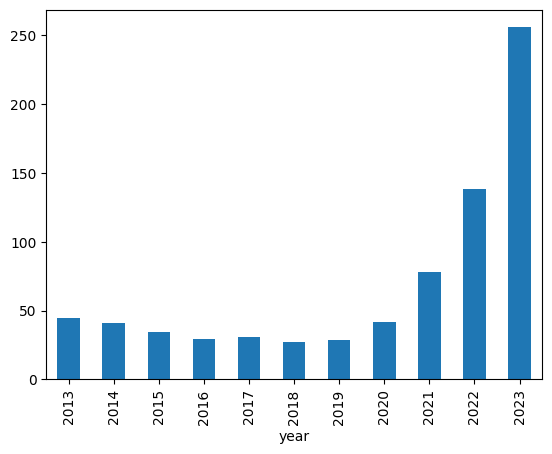

In [9]:
# yearly avg graph
data_grouped = data.groupby('year').mean()
data_grouped['Close'].plot.bar()
plt.show()

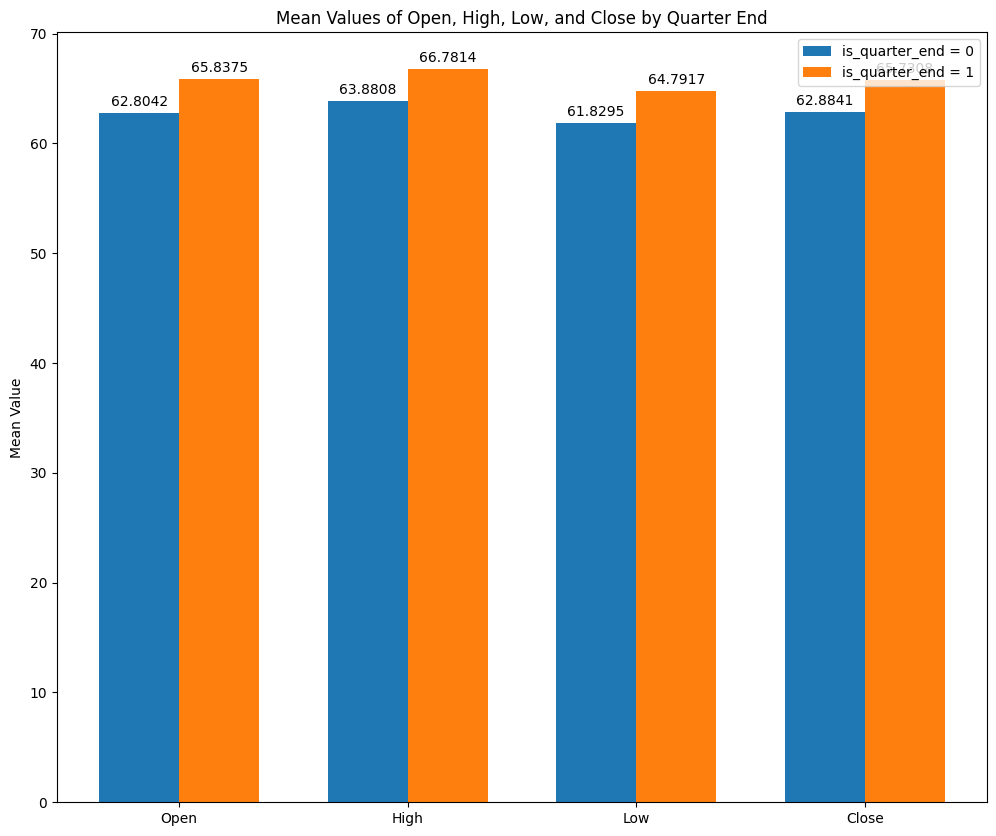

In [10]:
#quarters
quarters = data.groupby('is_quarter_end').mean()
columns_to_plot = ['Open', 'High', 'Low', 'Close']

# Prepare data for plotting
quarter_values = quarters[columns_to_plot].transpose()

# Plotting
x = np.arange(len(columns_to_plot))
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(12,10))
rects1 = ax.bar(x - width/2, quarter_values[0], width, label='is_quarter_end = 0')
rects2 = ax.bar(x + width/2, quarter_values[1], width, label='is_quarter_end = 1')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Value')
ax.set_title('Mean Values of Open, High, Low, and Close by Quarter End')
ax.set_xticks(x)
ax.set_xticklabels(columns_to_plot)
ax.legend()

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

plt.show()

In [11]:
#scaling

scaler = MinMaxScaler()
x = data[['open-close', 'low-high', 'Open']]
x = scaler.fit_transform(x)
 
y = data['Close']

x_train = x[0:2450]
y_train = y[0:2450]

x_test = x[2450:]
y_test = y[2450:]

D:\pito\Lib\site-packages\xgboost\data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


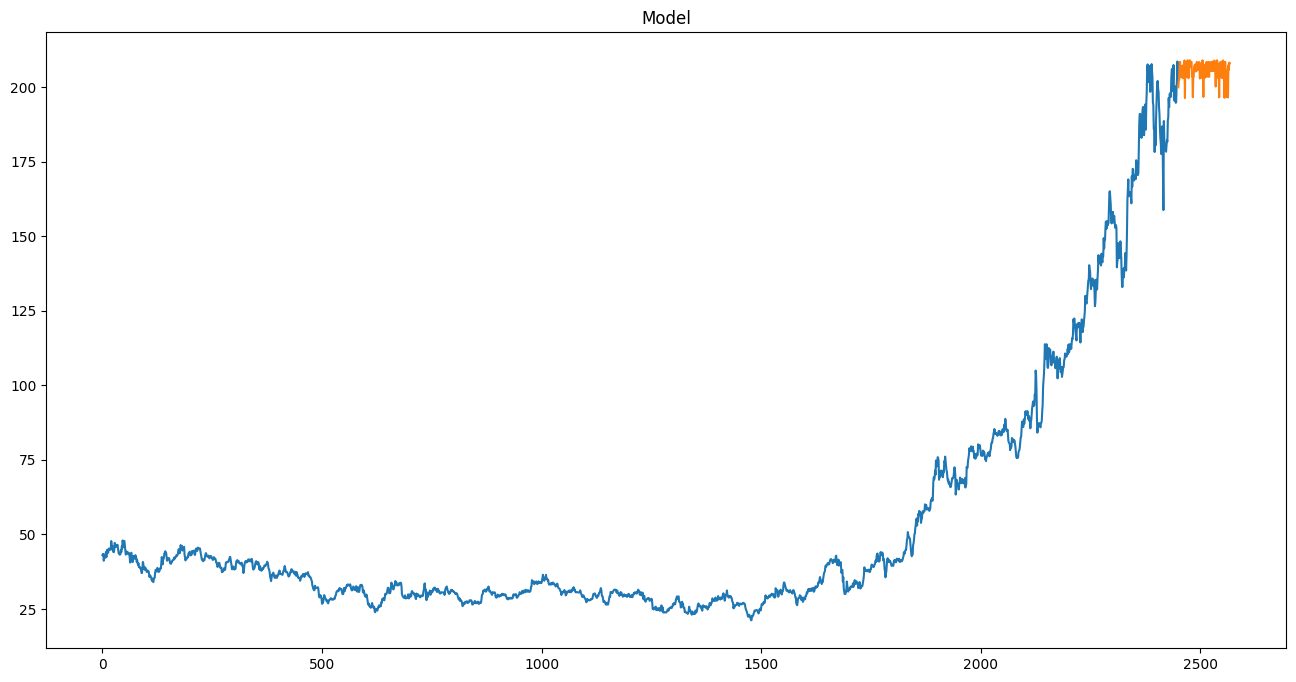

In [12]:
#model building

model = xgb.XGBRegressor()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

plt.figure(figsize=(16,8))
plt.title('Model')
plt.plot(data['Close'].iloc[0:2450])
plt.plot( range(2450,len(data)),predictions)
plt.show()